In [1]:
import pandas as pd
pd.options.display.max_rows = 100

# FieldGuide

In [2]:
df_fieldguide = pd.read_csv('data/controls.csv', header=0)

In [3]:
df_fieldguide.sort_values(by=["org_id", "framework_section_code"]).head(3)

,org_id,control,framework_section_code,framework_section_title
3007,1,[The organization] performs a risk assessment ...,A1.1,"The entity maintains, monitors, and evaluates ..."
3008,1,[The organization] defines availability monito...,A1.1,"The entity maintains, monitors, and evaluates ..."
3010,1,[The organization] performs backup restoration...,A1.2,"The entity authorizes, designs, develops or ac..."


# Data Prep clean

In [4]:
# 1. Convert data type
df_fieldguide = df_fieldguide.astype('string')

# 2. Fill NA
df_fieldguide = df_fieldguide.fillna("")

# 3. Remove Write Spaces
def strip_write_spaces(df, column_names, inplace=False):
    df_copy = df
    if inplace:
        df_copy = df.copy(deep=True)
    
    for c in column_names:
        df_copy[c] = df_copy[c].apply(lambda x: x.strip())
    return df_copy

df_fieldguide = strip_write_spaces(df_fieldguide, df_fieldguide.columns, inplace=True)

In [5]:
# 4. remove records with null
print(df_fieldguide[df_fieldguide["control"]==""])
df_fieldguide_cleaned = df_fieldguide[df_fieldguide["control"] != ""]

      org_id control framework_section_code  \
31987    455                          CC6.4   
31989    455                          CC6.5   
33008     id                          title   
45897    729                          CC6.4   

                                 framework_section_title  
31987  The entity restricts physical access to facili...  
31989  The entity discontinues logical and physical p...  
33008                                        description  
45897  The entity restricts physical access to facili...  


In [6]:
# 5. remove records without meaningful annotation
print(df_fieldguide_cleaned[df_fieldguide_cleaned['control'].apply(lambda x: "International Widget's" in x)].iloc[0]['control'])
df_fieldguide_cleaned = df_fieldguide_cleaned[df_fieldguide_cleaned['control']\
                              .apply(lambda x: "International Widget's" not in x)]

[International Widget'sInternational Widget'sInternational Widget'sInternational Widget'sInternational Widget'sInternational Widget'sInternational Widget'sInternational Widget'sInternational Widget'sInternational Widget'sInternational Widget'sInternational Widget'sInternational Widget'sInternational Widget'sInternational Widget'sInternational Widget's]International Widget'slInternational Widget'sInternational Widget'sInternational Widget'sInternational Widget'scInternational Widget'sInternational Widget'sInternational Widget'sInternational Widget'scInternational Widget'slInternational Widget'sInternational Widget'sInternational Widget'sfInternational Widget'sInternational Widget'smInternational Widget'sInternational Widget'sInternational Widget'sInternational Widget'sInternational Widget'sInternational Widget'sInternational Widget'syInternational Widget'sInternational Widget'sInternational Widget'smInternational Widget'sInternational Widget'scInternational Widget'sInternational Widget'

In [7]:
df_fieldguide_cleaned = df_fieldguide_cleaned.sort_values(by=["framework_section_code", "org_id"])

In [8]:
df_fieldguide_cleaned

,org_id,control,framework_section_code,framework_section_title
3007,1,[The organization] performs a risk assessment ...,A1.1,"The entity maintains, monitors, and evaluates ..."
3008,1,[The organization] defines availability monito...,A1.1,"The entity maintains, monitors, and evaluates ..."
36961,10,[The organization] defines availability monito...,A1.1,"The entity maintains, monitors, and evaluates ..."
36962,10,[The organization] performs a risk assessment ...,A1.1,"The entity maintains, monitors, and evaluates ..."
1108,136,[The organization] performs a risk assessment ...,A1.1,"The entity maintains, monitors, and evaluates ..."
...,...,...,...,...
30919,920,"Backup copies of information, software and sys...",PI1.5,The entity implements policies and procedures ...
15451,921,"Multiple measures, including access control, s...",PI1.5,The entity implements policies and procedures ...
15452,921,"Event logs, issue tracking records, vulnerabil...",PI1.5,The entity implements policies and procedures ...
36921,935,Data is reconciled on a monthly basis by rolli...,PI1.5,The entity implements policies and procedures ...


# Stats

In [9]:
df_fieldguide_cleaned.count()

org_id                     49442
control                    49442
framework_section_code     49442
framework_section_title    49442
dtype: int64

In [10]:
df_fieldguide_cleaned\
    .groupby(by=["framework_section_code", "framework_section_title"])\
    .agg({'org_id': ['nunique'], 'control': ['nunique', 'count']})\
    .head()

org_id  \
                                                                          nunique   
framework_section_code framework_section_title                                      
A1.1                   The entity maintains, monitors, and evaluates c...     166   
A1.2                   The entity authorizes, designs, develops or acq...     173   
A1.3                   The entity tests recovery plan procedures suppo...     167   
C1.1                   The entity identifies and maintains confidentia...     120   
C1.2                   The entity disposes of confidential information...     109   

                                                                          control  \
                                                                          nunique   
framework_section_code framework_section_title                                      
A1.1                   The entity maintains, monitors, and evaluates c...     225   
A1.2                   The entity authorizes, designs, develops or acq...     549   
A1.3                   The entity tests recovery plan procedures suppo...     217   
C1.1                   The entity identifies and maintains confidentia...     256   
C1.2                   The entity disposes of confidential information...     181   

                                                                                 
                                                                          count  
framework_section_code framework_section_title                                   
A1.1                   The entity maintains, monitors, and evaluates c...   401  
A1.2                   The entity authorizes, designs, develops or acq...  1128  
A1.3                   The entity tests recovery plan procedures suppo...   392  
C1.1                   The entity identifies and maintains confidentia...   322  
C1.2                   The entity disposes of confidential information...   212

In [11]:
df_fieldguide_cleaned[df_fieldguide_cleaned["framework_section_title"]=="Risk Mitigation"]

,org_id,control,framework_section_code,framework_section_title
24036,36,HCB reviews all XXXXXXXXXs in accordance with ...,CC9.0,Risk Mitigation


In [12]:
df_fieldguide_cleaned[df_fieldguide_cleaned["org_id"]=="36"]

,org_id,control,framework_section_code,framework_section_title
23930,36,Employees with performance deficiencies are en...,CC1.0,Control Environment
23931,36,HCB assesses and reviews all XXXXXXXXXs in acc...,CC1.0,Control Environment
23932,36,Executive management conducts weekly meetiAAAA...,CC1.0,Control Environment
23933,36,HCB maintains detailed job descriptions for al...,CC1.0,Control Environment
23934,36,Workplace conduct standards are documented in ...,CC1.0,Control Environment
...,...,...,...,...
24032,36,HCB performs an annual Business Continuity/Dis...,CC7.0,System Operations
24033,36,HCB utilizes vulnerability scanning tools to p...,CC7.0,System Operations
24034,36,HCB incorporates a Change Management Policy as...,CC8.0,Change Management
24035,36,HCB uses a standard image for all client and s...,CC8.0,Change Management


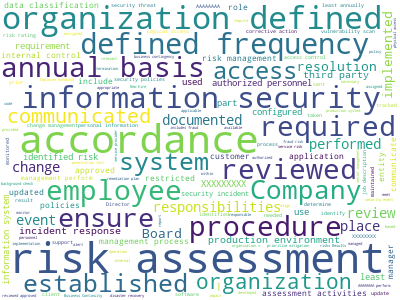

In [13]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df_fieldguide_cleaned['control'].values))
# Create a WordCloud object
wordcloud = WordCloud(
    background_color="white", max_words=500, contour_width=3, contour_color='steelblue', width=400, height=300
)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

# CCF

In [14]:
df_ccf = pd.read_csv('data/ccf.csv', header=0)

In [15]:
df_ccf = df_ccf.rename(columns={
    "Control Family": "control_category",
    "Control Sub-Family": "control_sub_category",
    "Control Short Name": "control_shortname",
    "Common Control Activity": "control",
})
df_ccf = df_ccf.rename({
    c: c.replace("\n", " ").replace("  ", "").replace("- ", "-").replace(" -", "-").replace(" ", "_").lower()
    for c in df_ccf.columns.tolist()
})

In [16]:
def clean_up_spreedsheet_text(text):
    # sometimes the text is in the spreadsheet has some unexpected newline symbol or whitespaces. standardize it
    return text.replace("\n", " ").replace("  ", " ").replace("- ", "-").replace("&", "and").strip()

# Clean up
df_ccf["control_category"] = df_ccf["control_category"].apply(clean_up_spreedsheet_text)
df_ccf["control_sub_category"] = df_ccf["control_sub_category"].apply(clean_up_spreedsheet_text)
df_ccf["control_shortname"] = df_ccf["control_shortname"].apply(clean_up_spreedsheet_text)

In [17]:
df_ccf.head()

,control_category,control_sub_category,control_shortname,control,ISO/IEC 27001\nISMS \nRef#,ISO/IEC 27001\nAnnex A \nRef#,ISO 22301,TSC - \nCommon Criteria,TSC - \nAvailability,TSC - Confidentiality,FedRAMP\nTailored \nRef#,PCI DSS V3.2.1\nRef#,GLBA Ref#,FERPA Ref#,BSI C5,HIPAA Security,NIST Cybersecurity,iRAP,Spanish ENS
0,Asset Management,Device and Media Inventory,Inventory Management,[The organization] maintains an inventory of s...,NaN,A.8.1.1,NaN,CC6.1.1,NaN,NaN,CM-8_N_00\nCM-8_N_01\nCM-8_N_02\nCM-8_N_03\nCM...,9.6.1\n9.7\n9.7.1,NaN,NaN,AM-01,164.310(D)(1),NaN,0336\n0159,8\n9\n10\n26
1,Asset Management,Device and Media Inventory,Inventory Management: Payment Card Systems,[The organization's] asset inventory includes ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.1.1\n12.3.4\n2.4\n9.6.1\n9.7\n9.9.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Asset Management,Device and Media Inventory,Inventory Labels,[The organization's] assets are labelled and h...,NaN,A.8.1.2,NaN,CC6.1.1,NaN,NaN,NaN,12.3.3\n9.6.1,NaN,NaN,AM-02,NaN,NaN,0294,8\n9\n10 \n26\n92\n93
3,Asset Management,Device and Media Transportation,Asset Transportation Authorization,[The organization] authorizes and records the ...,NaN,A.11.2.5\nA.11.2.6,NaN,CC6.5.2,NaN,NaN,MA-2_N_02\nMA-2_N_03\nPE-8_N_00,9.6.3,NaN,NaN,PI-02,164.310(d)(1)\n164.310(d)(2)(iii),ID.AM-4\nPR.DS-3,0336\n0159\n\n,57\n68\n69
4,Asset Management,Device and Media Transportation,Asset Transportation Documentation,[The organization] documents the transportatio...,NaN,A.11.2.5\nA.11.2.6\nA.8.3.3,NaN,CC6.5.2,NaN,NaN,MA-2_N_02\nMA-2_N_03,9.5\n9.6\n9.6.2\n9.6.3\n9.7,NaN,NaN,NaN,NaN,NaN,1599\n0310,57\n68\n69


In [18]:
# Control label distribution
df_ccf_summary = df_ccf.groupby("control_category").agg({"control": ["count"]})
df_ccf_summary = df_ccf_summary["control"].reset_index()
df_ccf_summary

,control_category,count
0,Asset Management,8
1,Backup Management,3
2,Business Continuity,6
3,Change Management,4
4,Configuration Management,10
5,Data Management,16
6,Entity Management,10
7,Identity and Access Management,35
8,Identity and Management,1
9,Incident Response,6


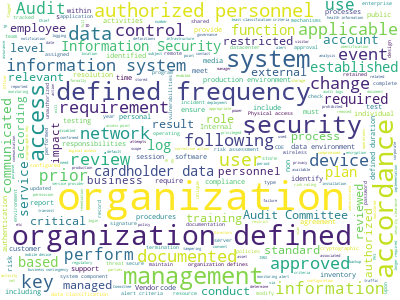

In [19]:
long_string = ','.join(list(df_ccf['control'].values))
# Create a WordCloud object
wordcloud = WordCloud(
    background_color="white", max_words=500, contour_width=3, contour_color='steelblue', width=400, height=300
)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

# SCF

In [20]:
df_scf = pd.read_csv('data/scf.csv', header=0)

In [21]:
df_scf = df_scf.rename(columns={c: c.replace("\n", " ") for c in df_scf.columns})
df_scf = df_scf.rename(columns={
    "SCF Domain": "control_category",
    "SCF Control": "control_shortname",
    "Secure Controls Framework (SCF) Control Description": "control",
})

In [22]:
df_scf.head()

,control_category,control_shortname,SCF #,control,Methods To Comply With SCF Controls,Evidence Request List (ERL) #,SCF Control Question,Relative Control Weighting,Function Grouping,SCRM Tier 1 Strategic,...,Threat MT-3,Threat MT-4,Threat MT-5,Threat MT-6,Threat MT-7,Threat MT-8,Threat MT-9,Threat MT-10,Threat MT-11,SCF Errata 2022.3
0,Security & Privacy Governance,Security & Privacy Governance Program,GOV-01,Mechanisms exist to facilitate the implementat...,- Steering committee\n- Digital Security Progr...,E-GOV-01\nE-GOV-02,Does the organization staff a function to cent...,10,Identify,X,...,NaN,NaN,NaN,NaN,MT-7,MT-8,MT-9,NaN,MT-11,- Updated FTC Act Part 314 mapping\n- Updated ...
1,Security & Privacy Governance,Steering Committee,GOV-01.1,"Mechanisms exist to coordinate cybersecurity, ...",- Steering committee\n- Digital Security Progr...,E-GOV-03,Does the organization coordinate cybersecurity...,7,Identify,X,...,MT-3,MT-4,MT-5,MT-6,MT-7,MT-8,MT-9,NaN,MT-11,- Updated ISO 27001:2013
2,Security & Privacy Governance,Status Reporting To Governing Body,GOV-01.2,Mechanisms exist to provide governance oversig...,NaN,E-CPL-05\nE-CPL-09\nE-GOV-03\nE-GOV-04\nE-GOV-...,Does the organization provide governance overs...,5,Identify,X,...,NaN,NaN,NaN,NaN,NaN,MT-8,MT-9,NaN,NaN,NaN
3,Security & Privacy Governance,Publishing Security & Privacy Documentation,GOV-02,"Mechanisms exist to establish, maintain and di...",- Steering committee\n- Digital Security Progr...,E-GOV-08\nE-GOV-09\nE-GOV-11,"Does the organization establish, maintain and ...",10,Identify,X,...,NaN,NaN,NaN,NaN,MT-7,MT-8,MT-9,NaN,MT-11,- Updated ISO 27001:2013
4,Security & Privacy Governance,Periodic Review & Update of Security & Privacy...,GOV-03,Mechanisms exist to review the cybersecurity a...,"- Governance, Risk and Compliance Solution (GR...",E-GOV-12,Does the organization review cybersecurity and...,7,Identify,X,...,NaN,NaN,NaN,NaN,MT-7,MT-8,MT-9,NaN,MT-11,NaN


In [23]:
df_scf["control_category"] = df_scf["control_category"].apply(clean_up_spreedsheet_text)
df_scf["control_shortname"] = df_scf["control_shortname"].apply(clean_up_spreedsheet_text)

In [24]:
import functools

# these are the same frameworks included in CCF
selected_framworks = [
    'COSO v2017',
    'ISO 27001 v2022',
    'ISO 22301 v2019',
    'ISO 27001 v2013',
    'US FedRAMP',
    'US FedRAMP (low)',
    'US FedRAMP (moderate)',
    'US FedRAMP (high)',
    'US FedRAMP (LI-SaaS)',
    'PCIDSS v3.2',
    'PCIDSS v4.0',
    'US GLBA CFR 314',
    'US FERPA',
    'BSI  Standard 200-1',
    'US HIPAA',
    'HIPAA - HICP Small Practice',
    'HIPAA - HICP Medium Practice',
    'HIPAA - HICP Large Practice',
    'NIST CSF v1.1',
    'AICPA TSC 2017 (SOC 2)'
]

In [25]:
df_scf_selected = df_scf[
    lambda x: functools.reduce(lambda a, b: a | b, [~x[c].isnull() for c in selected_framworks] )  
]
df_scf_selected_summary = df_scf_selected.groupby("control_category").agg({"control": ["count"]})["control"].reset_index()
df_scf_selected_summary.head(3)

,control_category,count
0,Asset Management,24
1,Business Continuity and Disaster Recovery,40
2,Capacity and Performance Planning,3


In [22]:
df_scf_summary = df_scf.groupby("control_category").agg({"control": ["count"]})
df_scf_summary = df_scf_summary["control"].reset_index()
df_scf_summary.head()

,control_category,count
0,Asset Management,56
1,Business Continuity and Disaster Recovery,50
2,Capacity and Performance Planning,4
3,Change Management,17
4,Cloud Security,18


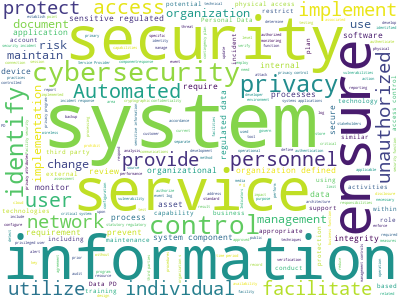

In [26]:
long_string = ','.join(
    list(df_scf_selected['control'].apply(lambda x:x.replace("Mechanisms exist", "").replace("mechanisms exist", "")).values)
)
# Create a WordCloud object
wordcloud = WordCloud(
    background_color="white", max_words=500, contour_width=3, contour_color='steelblue', width=400, height=300
)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [27]:
# Label overlap, not overlapped
pd.merge(
    df_scf_selected_summary.astype({"control_category": "string"}).rename(columns={"count": "scf_count"}),
    # df_scf_summary.astype({"control_category": "string"}).rename(columns={"count": "scf_count"}),
    df_ccf_summary.astype({"control_category": "string"}).rename(columns={"count": "ccf_count"}),
    how="outer",
    on=["control_category"],
    sort=True,
)

,control_category,scf_count,ccf_count
0,Asset Management,24.0,8.0
1,Backup Management,NaN,3.0
2,Business Continuity,NaN,6.0
3,Business Continuity and Disaster Recovery,40.0,NaN
4,Capacity and Performance Planning,3.0,NaN
5,Change Management,15.0,4.0
6,Cloud Security,16.0,NaN
7,Compliance,9.0,NaN
8,Configuration Management,21.0,10.0
9,Continuous Monitoring,50.0,NaN


# merge dataset

In [28]:
df_fieldguide_selected = df_fieldguide_cleaned
df_fieldguide_selected["source"] = "fieldguide"
df_ccf_selected = df_ccf[['control_category', 'control_sub_category', 'control_shortname', 'control',]].copy(deep=True)
df_ccf_selected["source"] = "ccf"
df_scf_selected = df_scf[['control_category', 'control_shortname', 'control']].copy(deep=True)
df_scf_selected["source"] = "scf"

In [29]:
df_union = pd.concat([df_fieldguide_selected, df_ccf_selected, df_scf_selected])

In [30]:
df_union.to_csv("./data/control_fg_ccf_scf.csv", header=True, index=False)